<a href="https://colab.research.google.com/github/panda1230/pytorch-cnn-visualizations/blob/master/Resnet18_ANS_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from torch.autograd import Variable

size_1 = 64   # 32 x 32
size_2 = 64
size_3 = 64
size_4 = 64
size_5 = 64
size_6 = 128  # 16 x 16
size_7 = 128
size_8 = 128
size_9 = 128
size_10 = 256 # 8 x 8
size_11 = 256
size_12 = 256
size_13 = 256
size_14 = 512 # 4 x 4
size_15 = 512
size_16 = 512
size_17 = 512


class Net(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(512, 100)


    def forward(self, x0):
        x1 = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)

        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64
        xS1 = F.relu(self.normS1(self.shortcut1(x1)))   # have to project x1 to have the same size as x3
        x3 = x3 + xS1                                   
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64
        xS2 = F.relu(self.normS2(self.shortcut2(x3)))   # have to project x3 to have the same size as x5
        x5 = x5 + xS2
        

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128
        xS3 = F.relu(self.normS3(self.shortcut3(x5)))   # have to project x5 to have the same size as x7
        x7 = x7 + xS3
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7)))   # have to project x7 to have the same size as x9
        x9 = x9 + xS4

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9)))   # have to project x9 to have the same size as x11
        x11 = x11 + xS5
        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11)))  # have to project x11 to have the same size as x13
        x13 = x13 + xS6

        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13)))  # have to project x13 to have the same size as x15
        x15 = x15 + xS7
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations


def test():
    net = Net()
    #net.eval()
    y, x = net(torch.randn(1,3,32,32))
    print(y.size())

test()

torch.Size([1, 100])


In [0]:
'''train network'''

device = 'cuda'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
num_epochs = 210
num_layers = 17

absolute_layer_energies = np.zeros((num_epochs, num_layers+1))
fractional_layer_energies = np.zeros((num_epochs, num_layers+1))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

test_acc = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies[epoch] = this_epoch_frac_energies
    absolute_layer_energies[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies[epoch, 0]))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            if batch_idx%100 == 0:
                test_acc.append(acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
        best_acc = max(acc, best_acc)
        if acc>=best_acc:
            #print('Saving')
            torch.save(net.state_dict(),'./sample_data/resnet18_net0.pth')
        print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers+1,), dtype = int)
    num_non_zeros = np.zeros((num_layers+1,), dtype = int)
    total_activations = np.zeros((num_layers+1,), dtype = int)
    fraction_non_zero = np.zeros((num_layers+1,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
     
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))
    
torch.save(fractional_layer_energies,'./sample_data/fraction_energy_net0.pth')

In [7]:
device = 'cuda'
best_acc = 0  # best test accuracy
num_epochs = 30
num_layers = 17

absolute_layer_energies = np.zeros((num_epochs, num_layers))
fractional_layer_energies = np.zeros((num_epochs, num_layers))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

state_dict = torch.load('./resnet18_net0.pth')
#from collections import OrderedDict
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove `module.`
#    new_state_dict[name] = v
# load params
net.load_state_dict(state_dict)

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

In [0]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    if epsilon!=0:
        perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [0]:
#PGD attack 
from torch.autograd import Variable

epsilon_range = [8/255, 16/255, 32/255]
num_steps=7
alpha = 2/255
num_classes = 10
for epsilon in epsilon_range:
    correct_count = 0
    correct_count_orig = 0
    for batch_idx, data in enumerate(testloader, 0):
        # get the inputs
        inputs, labels_tru = data
        

        # wrap them in Variable
        inp_var, true_label = Variable(inputs.cuda(), requires_grad = True), Variable(labels_tru.cuda()
                                                                                      , requires_grad = False)
        with torch.no_grad():
            output_target,_ = net(inp_var)
        _, y_pred_orig=  output_target.max(1)
        correct_count_orig += y_pred_orig.eq(true_label).sum().item()
        # Add ITERATIVE perturbation
        step =0
        inp_adv = Variable((inp_var.data.cpu() + (2* epsilon*torch.rand(inp_var.data.size())
                                           - epsilon)).cuda(), requires_grad = True) 
        while step < num_steps:
            output,_ = net(inp_adv)
            loss_ad = criterion(output, true_label)
            loss_ad.backward() #obtain gradient on inp_var
            eta = alpha * torch.sign(inp_adv.grad.data)
            eta = torch.clamp(eta, -epsilon, epsilon)
            inp_adv.data += eta
            step +=1
            
        y_prob,_ = net(inp_adv.cuda())
        _, y_pred = y_prob.max(1)
        correct_count += y_pred.eq(true_label).sum().item()
        #stop+=1
        
    print('Epsilon',epsilon)
    print('Clean accuracy:',correct_count_orig/100) #Note, divide by 100 for % accuracy
    print('Adversarial accuracy:',correct_count/100) #Note, divide by 100 for % accuracy

In [0]:
def test_attack( model, device, test_loader, epsilon ):
    model.eval()
    # Accuracy counter
    correct, correct_adv = 0, 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in testloader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output, _ = model(data)
        #_, predicted = output.max(1)
        #print(predicted)
        #total += targets.size(0)
        #correct += predicted.eq(target).sum().item()
        #init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(target)
        # If the initial prediction is wrong, dont bother attacking, just move on
        #if predicted != target:
        #    continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output, activations_adv = model(perturbed_data)

        # Check for success
        #final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        _, final_predicted = output.max(1)
        correct_adv += final_predicted.eq(target).sum().item()
        #if final_pred.item() == target.item():
        #    correct += 1
            # Special case for saving 0 epsilon examples
            #if (epsilon == 0) and (len(adv_examples) < 5):
            #    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        #else:
            # Save some adv examples for visualization later
        #    if len(adv_examples) < 5:
        #        adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
        #        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    #final_acc = correct/float(len(testloader))
    final_advacc = correct_adv/float(len(testloader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_adv, len(testloader), final_advacc))
    #print("True accuracy {}".format(final_acc))
    # Return the accuracy and an adversarial example
    return final_advacc, activations_adv

In [23]:
def test_clean(epoch):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
        return acc, activations

acc, _= test_clean(1)
print(acc)

0.7676


In [0]:
accuracies = []
activations_adv = []
epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, act_adv = test_attack(net, device, testloader, eps)
    accuracies.append(acc)
    activations_adv.append(act_adv)

Epsilon: 0.2	Test Accuracy = 908 / 100 = 9.08


In [0]:
accuracies_clean = []
activations_clean = []
#epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
acc, act = test_clean(1)
accuracies_clean.append(acc)
activations_clean.append(act)
print(acc)

In [0]:
ans_eps[1]

[tensor(0.4259, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.5100, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.5568, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.7203, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.7106, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.8318, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.7240, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.9678, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.7922, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.8836, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.8102, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.9298, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.8553, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.9620, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.9360, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(1.0327, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.9149, device='cuda:0', grad_fn=<MeanBackward0>

In [0]:
ans_eps =[]
for eps in range(1,len(epsilons)):
  ans=[]
  print(eps)
  for i in range(17):
      a_clean = activations_adv[0][i]
      a_adv = activations_adv[eps][i]
      Nr = torch.sum((a_clean-a_adv)**2, 1).sqrt()
      Dr = torch.sum((a_clean)**2,1).sqrt()
      Ans = Nr/Dr
      #print(Ans)
      ans.append(torch.mean(Ans))
  ans_eps.append(ans)

1
2
3
4
5
6


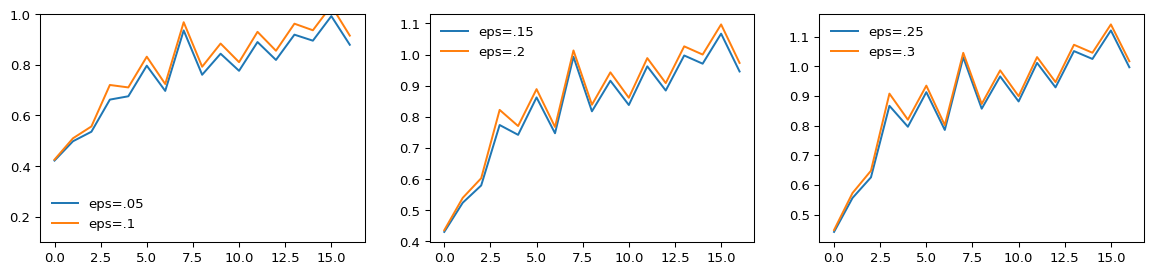

In [0]:
ylim = 1.0
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.legend(frameon = False)
plt.subplot(232)
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.legend(frameon = False)
plt.subplot(233)
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

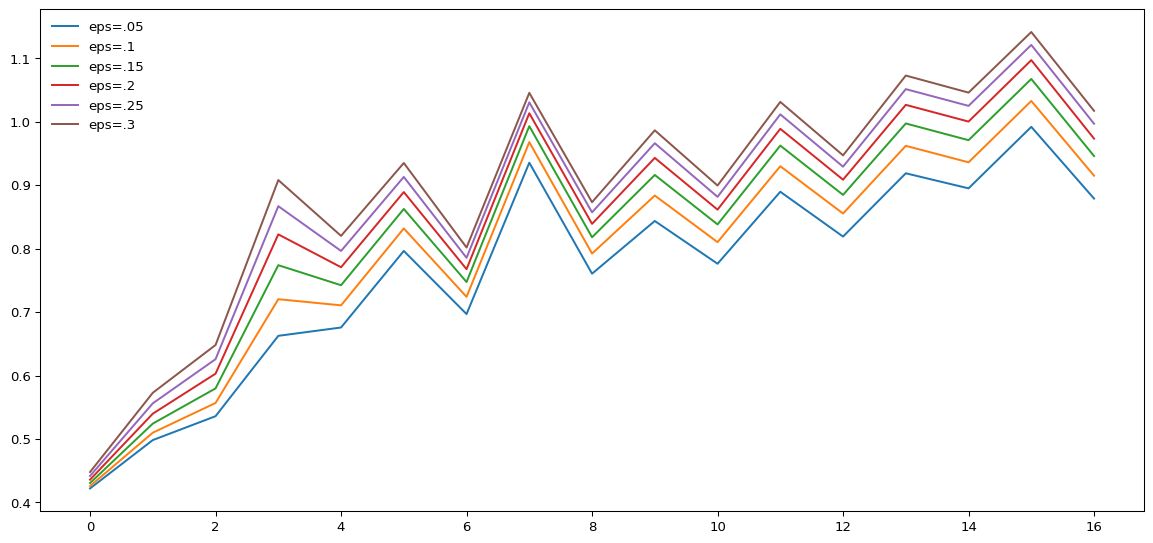

In [0]:
ylim = 1.0
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
#plt.subplot(231)
#plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

In [0]:
# Making the activations k-bit. 
class BinActive2(torch.autograd.Function):
    '''
    Make the input activations k-bit
    '''
    def forward(self, input, k):
        self.save_for_backward(input)
        size = input.size()
        mean = torch.mean(input.abs(), 1, keepdim=True)
        x = input
        #print(x)
        xmax = x.abs().max()
        num_bits=k
        v0 = 1
        v1 = 2
        v2 = -0.5
        y = k #2.**num_bits - 1.
        #print(y)
        x = x.add(v0).div(v1)
        #print(x)
        x = x.mul(y).round_()
        #print(x)
        x = x.div(y)
        #print(x)
        x = x.add(v2)
        #print(x)
        x = x.mul(v1)
        #print(x)
        input = x
        return input, mean

    def backward(self, grad_output, grad_output_mean):
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        #grad_input[input.ge(1)] = 0
        #grad_input[input.le(-1)] = 0
        return grad_input, grad_input

In [0]:
'''
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt

size_1 = 64   # 32 x 32
size_2 = 64
size_3 = 64
size_4 = 64
size_5 = 64
size_6 = 128  # 16 x 16
size_7 = 128
size_8 = 128
size_9 = 128
size_10 = 256 # 8 x 8
size_11 = 256
size_12 = 256
size_13 = 256
size_14 = 512 # 4 x 4
size_15 = 512
size_16 = 512
size_17 = 512


class Net_q(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net_q, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(512, 100)


    def forward(self, x0):
        x1u = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)
        x1, mean = BinActive2()(x1u, k[0])
        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x2, mean = BinActive2()(x2, k[1])
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64
        xS1 = F.relu(self.normS1(self.shortcut1(x1u)))   # have to project x1 to have the same size as x3
        x3u = x3 + xS1   
        x3, mean = BinActive2()(x3u, k[2])                                
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x4, mean = BinActive2()(x4, k[3])
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64
        xS2 = F.relu(self.normS2(self.shortcut2(x3u)))   # have to project x3 to have the same size as x5
        x5u = x5 + xS2
        x5, mean = BinActive2()(x5u, k[4])

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x6, mean = BinActive2()(x6, k[5])
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128
        xS3 = F.relu(self.normS3(self.shortcut3(x5u)))   # have to project x5 to have the same size as x7
        x7u = x7 + xS3
        x7, mean = BinActive2()(x7u, k[6])
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x8, mean = BinActive2()(x8, k[7])
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7u)))   # have to project x7 to have the same size as x9
        x9u = x9 + xS4
        x9, mean = BinActive2()(x9u, k[8])

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x10, mean = BinActive2()(x10, k[9])       
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9u)))   # have to project x9 to have the same size as x11
        x11u = x11 + xS5
        x11, mean = BinActive2()(x11u, k[10]) 
        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x12, mean = BinActive2()(x10, k[11]) 
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11u)))  # have to project x11 to have the same size as x13
        x13u = x13 + xS6
        x13, mean = BinActive2()(x13u, k[12]) 
        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x14, mean = BinActive2()(x14, k[13]) 
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13u)))  # have to project x13 to have the same size as x15
        x15u = x15 + xS7
        x15, mean = BinActive2()(x15u, k[14]) 
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x16, mean = BinActive2()(x16, k[15]) 
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15u)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8
        x17, mean = BinActive2()(x17, k[16]) 

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations
        '''

In [0]:
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt

size_1 = 64   # 32 x 32
size_2 = 64
size_3 = 64
size_4 = 64
size_5 = 64
size_6 = 128  # 16 x 16
size_7 = 128
size_8 = 128
size_9 = 128
size_10 = 256 # 8 x 8
size_11 = 256
size_12 = 256
size_13 = 256
size_14 = 512 # 4 x 4
size_15 = 512
size_16 = 512
size_17 = 512


class Net_q(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net_q, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(512, 100)


    def forward(self, x0):
        x1 = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)
        x1, mean = BinActive2()(x1, k[0])
        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x2, mean = BinActive2()(x2, k[1])
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64 
        xS1 = F.relu(self.normS1(self.shortcut1(x1)))   # have to project x1 to have the same size as x3
        x3 = x3 + xS1         
        x3, mean = BinActive2()(x3, k[2])                                 
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x4, mean = BinActive2()(x4, k[3])
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64        
        xS2 = F.relu(self.normS2(self.shortcut2(x3)))   # have to project x3 to have the same size as x5
        x5 = x5 + xS2
        x5, mean = BinActive2()(x5, k[4])

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x6, mean = BinActive2()(x6, k[5])
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128        
        xS3 = F.relu(self.normS3(self.shortcut3(x5)))   # have to project x5 to have the same size as x7
        x7 = x7 + xS3
        x7, mean = BinActive2()(x7, k[6])
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x8, mean = BinActive2()(x8, k[7])
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7)))   # have to project x7 to have the same size as x9
        x9 = x9 + xS4
        x9, mean = BinActive2()(x9, k[8])

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x10, mean = BinActive2()(x10, k[9])       
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9)))   # have to project x9 to have the same size as x11
        x11 = x11 + xS5
        x11, mean = BinActive2()(x11, k[10])

        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x12, mean = BinActive2()(x10, k[11]) 
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11)))  # have to project x11 to have the same size as x13
        x13 = x13 + xS6
        x13, mean = BinActive2()(x13, k[12])

        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x14, mean = BinActive2()(x14, k[13]) 
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13)))  # have to project x13 to have the same size as x15
        x15 = x15 + xS7
        x15, mean = BinActive2()(x15, k[14])
         
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x16, mean = BinActive2()(x16, k[15]) 
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8
        x17, mean = BinActive2()(x17, k[16]) 

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations

In [0]:
net_q = Net_q()
net_q = net_q.to(device)
net_q = torch.nn.DataParallel(net_q)
cudnn.benchmark = True

#state_dict = torch.load('./sample_data/resnet18_net0.pth')
#from collections import OrderedDict
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove `module.`
#    new_state_dict[name] = v
# load params
#net_q.load_state_dict(state_dict)

In [0]:
from torch.autograd import Variable
global k
bits = 64
#k=Variable(torch.tensor([255, 255, 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]), requires_grad=False)
k=Variable(torch.tensor([2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 
                         2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 
                         2^bits-1]), requires_grad=False)

def test_clean_q(epoch):
    net_q.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
           
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net_q(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total*100
        return acc, activations
acc, _=test_clean_q(1)
print(acc)

0.95


In [0]:
global k
bits = 32
#k=Variable(torch.tensor([255, 255, 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]), requires_grad=False)
k=Variable(torch.tensor([2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 
                         2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 2^bits-1, 
                         2^bits-1]), requires_grad=False)

accuracies_adv = []
epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, _ = test_attack(net_q, device, testloader, eps)
    accuracies_adv.append(acc)

In [0]:
import torch.nn as nn
import numpy

class BinOp():
    def __init__(self, model):
        # count the number of Conv2d
        count_Conv2d = 0
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                count_Conv2d = count_Conv2d + 1
        print(count_Conv2d)
        start_range = 1
        end_range = count_Conv2d
        self.bin_range = numpy.linspace(start_range,
                end_range, end_range-start_range+1)\
                        .astype('int').tolist()
        print(self.bin_range)
        #kbit_conn = numpy.array([0, 1, 2, 4, 6, 7, 8, 9, 11, 12,13, 14, 16, 17, 18, 19]) #layers whose weights need to be made k-bit
        #kbit_conn = kbit_conn.astype('int').tolist()
        #print(kbit_conn)
        #raw_input()
        self.num_of_params = len(self.bin_range)
        self.saved_params = []
        self.target_params = []
        self.target_modules = []
        index = -1
        print(self.num_of_params)
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                print(m)
                index = index + 1
                #print(index)
                #if index in self.bin_range:
                #    tmp = m.weight.data.clone()
                #    self.saved_params.append(tmp)
                #    self.target_modules.append(m.weight)
                #if index in kbit_conn:
                print('Making k-bit') #Know which layers weights are being made k-bit
                    #raw_input()
                tmp = m.weight.data.clone()
                self.saved_params.append(tmp)
                self.target_modules.append(m.weight)

    def binarization(self):
        #self.meancenterConvParams()
        #self.clampConvParams()
        self.save_params()
        self.binarizeConvParams()

    def meancenterConvParams(self):
        for index in range(self.num_of_params):
            s = self.target_modules[index].data.size()
            #print(index)
            #print(s)
            negMean = self.target_modules[index].data.mean(1, keepdim=True).\
                    mul(-1).expand_as(self.target_modules[index].data)
            self.target_modules[index].data = self.target_modules[index].data.add(negMean)

    def clampConvParams(self):
        for index in range(self.num_of_params):
            self.target_modules[index].data = \
                    self.target_modules[index].data.clamp(-1.0, 1.0)

    def save_params(self):
        for index in range(self.num_of_params):
            self.saved_params[index].copy_(self.target_modules[index].data)

    def binarizeConvParams(self):
        #kbit_conn = numpy.array([0, 1, 3, 4, 6, 7, 8, 9, 11, 12,13, 14, 16, 17, 18, 19])
        #num_bits = numpy.array([65408	,61440	,63488	,63488	,57344	,61440	,57344	,57344	,61440	,49152	,61440	,61440
        #                        ,64512	,65408	,65280	,65408	,65280	,65024	,57344	,49152	,65408])/257#numpy.array([255,	192,	224,	224,	128,	192,	192,	192,	192,	128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	255])
        #num_bits = numpy.array([65408	,255	,255	,255	,255	,255 ,255	,255	,255	,255	,255,255	,65408	,65280	,65408	,65280	,65024	,255	,49152	,65408])
        num_bits = weight_conn
        #kbit_conn = kbit_conn.astype('int').tolist()
        for index in range(self.num_of_params):
            #print(index)
            #n = self.target_modules[index].data[0].nelement()
            #s = self.target_modules[index].data.size()
            #m = self.target_modules[index].data.norm(1, 3, keepdim=True)\
            #        .sum(2, keepdim=True).sum(1, keepdim=True).div(n)

            #if index in kbit_conn:
	    	    #k-bit weights
            x = self.target_modules[index].data
            xmax = x.abs().max()
            v0 = 1
            v1 = 2
            v2 = -0.5
            y = num_bits[index]#+std[index]#torch.normal(0,std[index], size=(1,1))#2.**num_bits[index] - 1.
            #print(y)
            x = x.add(v0).div(v1)
            #print(x)
            x = x.mul(y).round_()
            x = x.div(y)
            x = x.add(v2)
            x = x.mul(v1)
            self.target_modules[index].data = x#.mul(m.expand(s))
            #self.target_modules[index].data = \
            #        self.target_modules[index].data.sign().mul(m.expand(s))

    def restore(self):
        for index in range(self.num_of_params):
            self.target_modules[index].data.copy_(self.saved_params[index])

    def updateBinaryGradWeight(self):
        for index in range(self.num_of_params):
            weight = self.target_modules[index].data
            n = weight[0].nelement()
            s = weight.size()
            m = weight.norm(1, 3, keepdim=True)\
                    .sum(2, keepdim=True).sum(1, keepdim=True).div(n).expand(s)
            m[weight.lt(-1.0)] = 0 
            m[weight.gt(1.0)] = 0
            # m = m.add(1.0/n).mul(1.0-1.0/s[1]).mul(n)
            # self.target_modules[index].grad.data = \
            #         self.target_modules[index].grad.data.mul(m)
            m = m.mul(self.target_modules[index].grad.data)
            m_add = weight.sign().mul(self.target_modules[index].grad.data)
            m_add = m_add.sum(3, keepdim=True)\
                    .sum(2, keepdim=True).sum(1, keepdim=True).div(n).expand(s)
            m_add = m_add.mul(weight.sign())
            self.target_modules[index].grad.data = m.add(m_add).mul(1.0-1.0/s[1]).mul(n)

In [0]:

def test_attack_quant( model, device, test_loader, epsilon ):
   # define the binarization operator
    bin_op = BinOp(model)
    model.eval()
    # Accuracy counter
    correct, correct_adv = 0, 0
    adv_examples = []
    bin_op.binarization()
    # Loop over all examples in test set
    for data, target in testloader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output, _ = model(data)
        #_, predicted = output.max(1)
        #print(predicted)
        #total += targets.size(0)
        #correct += predicted.eq(target).sum().item()
        #init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(target)
        # If the initial prediction is wrong, dont bother attacking, just move on
        #if predicted != target:
        #    continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output, activations_adv = model(perturbed_data)
        # Check for success
        #final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        _, final_predicted = output.max(1)
        correct_adv += final_predicted.eq(target).sum().item()
        #if final_pred.item() == target.item():
        #    correct += 1
            # Special case for saving 0 epsilon examples
            #if (epsilon == 0) and (len(adv_examples) < 5):
            #    adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #    adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        #else:
            # Save some adv examples for visualization later
        #    if len(adv_examples) < 5:
        #        adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
        #        adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    #final_acc = correct/float(len(testloader))
    bin_op.restore()
    final_advacc = correct_adv/float(len(testloader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct_adv, len(testloader), final_advacc))
    #print("True accuracy {}".format(final_acc))
    # Return the accuracy and an adversarial example
    return final_advacc, activations_adv


In [0]:
#PGD attack on Quantized model
import warnings
warnings.filterwarnings('ignore')
from torch.autograd import Variable
global k
global weight_conn
#Quant
k=Variable(torch.tensor([511,	255,	127,	15,	31,	7,	15,	3,	7,	3,	7,	3,	3,	3,	3,	3,	3 ]).cuda(), requires_grad=False)
weight_conn = numpy.array([511,	255,	127, 127,	15,	31, 31,	7,	15, 15,	3,	7, 7,	3,	7, 7,	3,	3, 3,	3,	3, 3,	3,	3, 3])
bin_op = BinOp(net_q)
net_q.eval()
epsilon_range = [8/255, 16/255, 32/255]
num_steps=7
alpha = 2/255
num_classes = 10

for epsilon in epsilon_range:
    correct_count = 0
    correct_count_orig = 0
    bin_op.binarization()
    for batch_idx, data in enumerate(testloader, 0):
        # get the inputs
        inputs, labels_tru = data
        

        # wrap them in Variable
        inp_var, true_label = Variable(inputs.cuda(), requires_grad = True), Variable(labels_tru.cuda()
                                                                                      , requires_grad = False)
        with torch.no_grad():
            output_target,_ = net_q(inp_var)
        _, y_pred_orig=  output_target.max(1)
        correct_count_orig += y_pred_orig.eq(true_label).sum().item()
        # Add ITERATIVE perturbation
        step =0
        inp_adv = Variable((inp_var.data.cpu() + (2* epsilon*torch.rand(inp_var.data.size())
                                           - epsilon)).cuda(), requires_grad = True) 
        while step < num_steps:
            output,_ = net_q(inp_adv)
            loss_ad = criterion(output, true_label)
            loss_ad.backward() #obtain gradient on inp_var
            eta = alpha * torch.sign(inp_adv.grad.data)
            eta = torch.clamp(eta, -epsilon, epsilon)
            inp_adv.data += eta
            step +=1
            
        y_prob,_ = net_q(inp_adv.cuda())
        _, y_pred = y_prob.max(1)
        correct_count += y_pred.eq(true_label).sum().item()
        #stop+=1
    bin_op.restore()    
    print('Epsilon',epsilon)
    print('Clean accuracy:',correct_count_orig/100) #Note, divide by 100 for % accuracy
    print('Adversarial accuracy:',correct_count/100) #Note, divide by 100 for % accuracy

In [11]:
import warnings
warnings.filterwarnings('ignore')
from torch.autograd import Variable
num_epochs = 210
num_layers = 17

absolute_layer_energies = np.zeros((num_epochs, num_layers))
fractional_layer_energies = np.zeros((num_epochs, num_layers))
print('==> Building model..')

net_qt = Net_q()
net_qt = net_qt.to(device)
net_qt = torch.nn.DataParallel(net_qt)
cudnn.benchmark = True
state_dict = torch.load('./sample_data/vgg19_net_d_52.pth')
net_qt.load_state_dict(state_dict)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_qt.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
best_acc =0
test_acc = []
bin_op = BinOp(net_qt)

global k
global weight_conn
#Quant
k=Variable(torch.tensor([511,	255,	127,	15,	31,	7,	15,	3,	7,	3,	7,	3,	3,	3,	3,	3,	3 ]).cuda(), requires_grad=False)
weight_conn = numpy.array([511,	255,	127, 127,	15,	31, 31,	7,	15, 15,	3,	7, 7,	3,	7, 7,	3,	3, 3,	3,	3, 3,	3,	3, 3])
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        bin_op.binarization()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net_qt(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        bin_op.restore()
        #bin_op.updateBinaryGradWeight()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
    print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))         
    #this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    #fractional_layer_energies[epoch] = this_epoch_frac_energies
    #absolute_layer_energies[epoch] = this_epoch_abs_energies
    #print('Total activation density: %.3f' % (fractional_layer_energies[epoch, 0]))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    bin_op.binarization()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net_qt(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            
            if batch_idx%100 == 0:
                test_acc.append(acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
        bin_op.restore()
        best_acc = max(acc, best_acc)
        if acc>=best_acc:
            torch.save(net_qt.state_dict(),'./sample_data/vgg19_net_qt2.pth')
        print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
        

def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((22,), dtype = int)
    num_non_zeros = np.zeros((22,), dtype = int)
    total_activations = np.zeros((22,), dtype = int)
    fraction_non_zero = np.zeros((22,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(53, num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net_qt.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net_qt.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))

==> Building model..
25
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
25
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
Making k-bit
Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Making k-bit
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
Making k-bit
Conv2d(128, 128,

In [12]:
import warnings
warnings.filterwarnings('ignore')
from torch.autograd import Variable
print('==> Building model..')
#net_qt = Net_q()
#net_qt = net_qt.to(device)
#net_qt = torch.nn.DataParallel(net_qt)
#cudnn.benchmark = True
#state_dict = torch.load('./sample_data/vgg19_net_qt1.pth')
#net_qt.load_state_dict(state_dict)
#k=Variable(torch.tensor([511,	15,	31,	31,	7,	15,	7,	7,	15,	3,	15,	15,	63,	511,	255,	511,	255,	127,	7,	3,	3]).cuda(), requires_grad=False)
#weight_conn = numpy.array([511,	15,	31,	31,	7,	15,	7,	7,	15,	3,	15,	15,	63,	511,	255,	511,	255,	127,	7,	3,	3])
criterion = nn.CrossEntropyLoss()
#global k
#k=Variable(torch.tensor([248,	192,	224,	224,	128,	192,	192,	192,	192,	
#                         128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	248]).cuda(), requires_grad=False)

#global weight_conn
#weight_conn = numpy.array([248,	192,	224,	224,	128,	192,	192,	192,	192,	
#                         128,	192,	192,	224,	240,	240,	248,	240,	240,	128,	128,	248])

accuracies_adv = []
activations_adv = []
epsilons = [0, .05, .1, .15, .2, .25, .3]
device = torch.device("cuda")
# Run test for each epsilon
for eps in epsilons:
    acc, act_adv = test_attack_quant(net_qt, device, testloader, eps)
    accuracies_adv.append(acc)
    activations_adv.append(act_adv)

==> Building model..
25
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
25
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
Making k-bit
Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Making k-bit
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Making k-bit
Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
Making k-bit
Conv2d(128, 128,

In [13]:
accuracies_adv

[68.63, 13.86, 10.37, 7.93, 6.87, 5.49, 4.76]

In [15]:
ans_eps =[]
for eps in range(1,len(epsilons)):
  ans=[]
  print(eps)
  for i in range(17):
      a_clean = activations_adv[0][i]
      a_adv = activations_adv[eps][i]
      Nr = torch.sum((a_clean-a_adv)**2, 1).sqrt()
      Dr = torch.sum((a_clean)**2,1).sqrt()
      Ans = Nr/Dr
      #print(Ans)
      ans.append(torch.mean(Ans))
  ans_eps.append(ans)

1
2
3
4
5
6


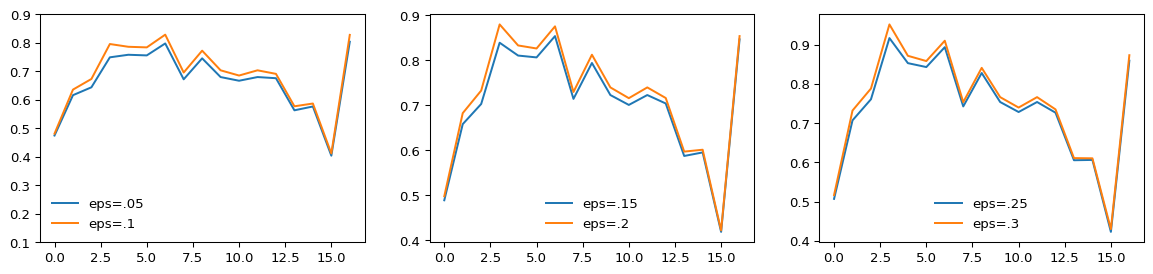

In [16]:
ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.legend(frameon = False)
plt.subplot(232)
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.legend(frameon = False)
plt.subplot(233)
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

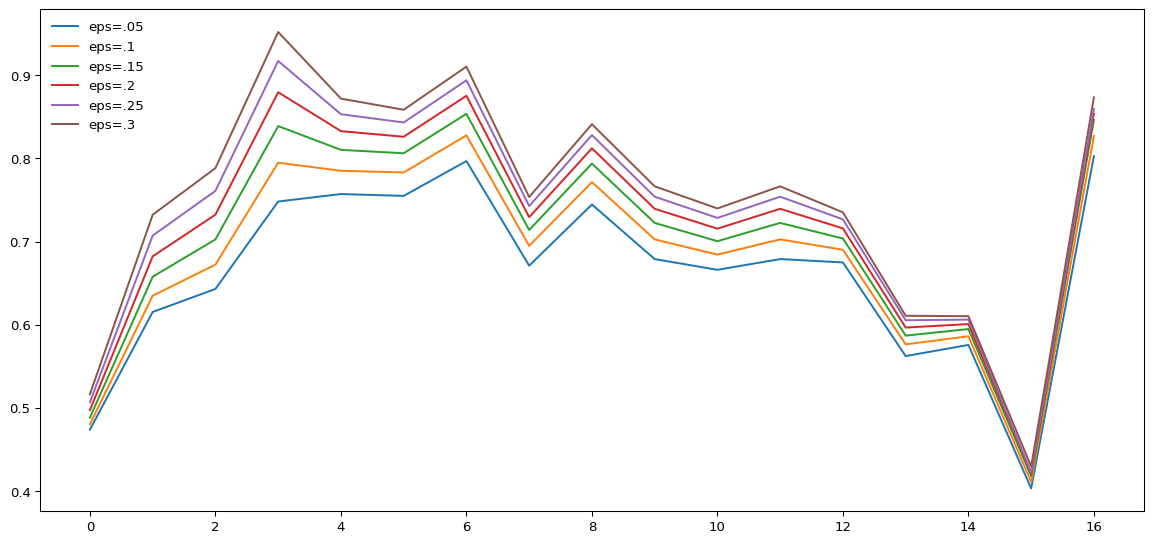

In [17]:
ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
#plt.subplot(231)
#plt.ylim(ylow, ylim)
plt.plot(ans_eps[0], label = 'eps=.05')
plt.plot(ans_eps[1], label = 'eps=.1')
plt.plot(ans_eps[2], label = 'eps=.15')
plt.plot(ans_eps[3], label = 'eps=.2')
plt.plot(ans_eps[4], label = 'eps=.25')
plt.plot(ans_eps[5], label = 'eps=.3')
plt.legend(frameon = False)

In [0]:
ans_eps[1]

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

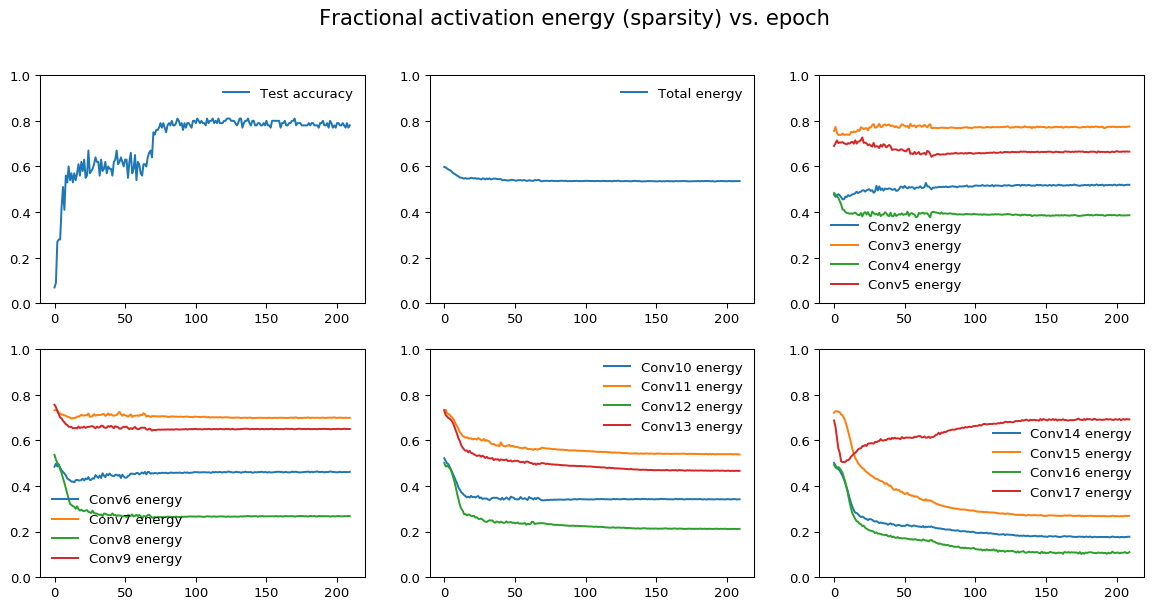

In [0]:
total_energy = fractional_layer_energies[:,0]
conv1_energy = fractional_layer_energies[:,1]
conv2_energy = fractional_layer_energies[:,2]
conv3_energy = fractional_layer_energies[:,3]
conv4_energy = fractional_layer_energies[:,4]
conv5_energy = fractional_layer_energies[:,5]
conv6_energy = fractional_layer_energies[:,6]
conv7_energy = fractional_layer_energies[:,7]
conv8_energy = fractional_layer_energies[:,8]
conv9_energy = fractional_layer_energies[:,9]
conv10_energy = fractional_layer_energies[:,10]
conv11_energy = fractional_layer_energies[:,11]
conv12_energy = fractional_layer_energies[:,12]
conv13_energy = fractional_layer_energies[:,13]
conv14_energy = fractional_layer_energies[:,14]
conv15_energy = fractional_layer_energies[:,15]
conv16_energy = fractional_layer_energies[:,16]
conv17_energy = fractional_layer_energies[:,17]



ylim = 1
ylow = 0 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(0, 1)
plt.plot(test_acc, label = 'Test accuracy')
plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
#plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.plot(conv17_energy, label = 'Conv17 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)

In [0]:
fractional_layer_energies = torch.load('./sample_data/fraction_energy_net0.pth')

In [0]:
num_epochs =26

size_1 = int(fractional_layer_energies[num_epochs-1, 1] * 64)
size_2 = int(fractional_layer_energies[num_epochs-1, 2] * 64)
size_3 = int(fractional_layer_energies[num_epochs-1, 3] * 64)
size_4 = int(fractional_layer_energies[num_epochs-1, 4] * 64)
size_5 = int(fractional_layer_energies[num_epochs-1, 5] * 64)
size_6 = int(fractional_layer_energies[num_epochs-1, 6] * 128)
size_7 = int(fractional_layer_energies[num_epochs-1, 7] * 128)
size_8 = int(fractional_layer_energies[num_epochs-1, 8] * 128)
size_9 = int(fractional_layer_energies[num_epochs-1, 9] * 128)
size_10 = int(fractional_layer_energies[num_epochs-1, 10] * 256)
size_11 = int(fractional_layer_energies[num_epochs-1, 11] * 256)
size_12 = int(fractional_layer_energies[num_epochs-1, 12] * 256)
size_13 = int(fractional_layer_energies[num_epochs-1, 13] * 256)
size_14 = int(fractional_layer_energies[num_epochs-1, 14] * 512)
size_15 = int(fractional_layer_energies[num_epochs-1, 15] * 512)
size_16 = int(fractional_layer_energies[num_epochs-1, 16] * 512)
size_17 = int(fractional_layer_energies[num_epochs-1, 17] * 512)
print(size_1, size_2, size_3, size_4, size_5, size_6, size_7, size_8, size_9, size_10, size_11, size_12, size_13, size_14, size_15, size_16, size_17)

39 31 49 24 44 54 90 36 84 88 155 65 136 130 231 105 300


In [0]:
class Net1(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net1, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(size_17, 100)


    def forward(self, x0):
        x1 = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)

        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64
        xS1 = F.relu(self.normS1(self.shortcut1(x1)))   # have to project x1 to have the same size as x3
        x3 = x3 + xS1                                   
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64
        xS2 = F.relu(self.normS2(self.shortcut2(x3)))   # have to project x3 to have the same size as x5
        x5 = x5 + xS2
        

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128
        xS3 = F.relu(self.normS3(self.shortcut3(x5)))   # have to project x5 to have the same size as x7
        x7 = x7 + xS3
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7)))   # have to project x7 to have the same size as x9
        x9 = x9 + xS4

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9)))   # have to project x9 to have the same size as x11
        x11 = x11 + xS5
        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11)))  # have to project x11 to have the same size as x13
        x13 = x13 + xS6

        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13)))  # have to project x13 to have the same size as x15
        x15 = x15 + xS7
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations


In [0]:
'''train network 1'''

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

device = 'cuda'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
num_epochs = 210
num_layers = 17

absolute_layer_energies1 = np.zeros((num_epochs, num_layers+1))
fractional_layer_energies1 = np.zeros((num_epochs, num_layers+1))


print('==> Building model..')
net1 = Net1()
net1 = net1.to(device)
net1 = torch.nn.DataParallel(net1)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.08, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net1.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    # global absolute_layer_energies
    # global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        acc = correct/total    
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies1[epoch] = this_epoch_frac_energies
    absolute_layer_energies1[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies1[epoch, 0]))


def test(epoch):
    global best_acc
    net1.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net1(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            if batch_idx%100 == 0:
                best_acc = max(acc, best_acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc:
                #print('Saving')
                torch.save(net1.state_dict(),'./sample_data/resnet18_net1.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers+1,), dtype = int)
    num_non_zeros = np.zeros((num_layers+1,), dtype = int)
    total_activations = np.zeros((num_layers+1,), dtype = int)
    fraction_non_zero = np.zeros((num_layers+1,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))

        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net1.parameters(), lr=0.005, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net1.parameters(), lr=0.0005, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))


torch.save(fractional_layer_energies1,'./sample_data/fraction_energy_net1.pth')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0
0 100 Lap time (s): 0.13 | Loss: 4.702 | Acc: 0.781% (2/256)
100 100 Lap time (s): 6.18 | Loss: 4.236 | Acc: 5.550% (1435/25856)
Total activation density: 0.617
0 100 Lap time (s): 0.08 | Loss: 3.948 | Acc: 7.000% (7/100) | Best acc: 0.070
Elapsed time: 40.69

Epoch: 1
0 100 Lap time (s): 0.12 | Loss: 3.696 | Acc: 13.672% (35/256)
100 100 Lap time (s): 5.96 | Loss: 3.582 | Acc: 14.032% (3628/25856)
Total activation density: 0.622
0 100 Lap time (s): 0.09 | Loss: 3.741 | Acc: 14.000% (14/100) | Best acc: 0.140
Elapsed time: 57.03

Epoch: 2
0 100 Lap time (s): 0.12 | Loss: 3.276 | Acc: 21.484% (55/256)
100 100 Lap time (s): 6.00 | Loss: 3.176 | Acc: 20.958% (5419/25856)
Total activation density: 0.626
0 100 Lap time (s): 0.08 | Loss: 3.341 | Acc: 24.000% (24/100) | Best acc: 0.240
Elapsed time: 71.30

Epoch: 3
0 100 Lap time (s): 0.12 | Loss: 2.654 | Acc: 30.469

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

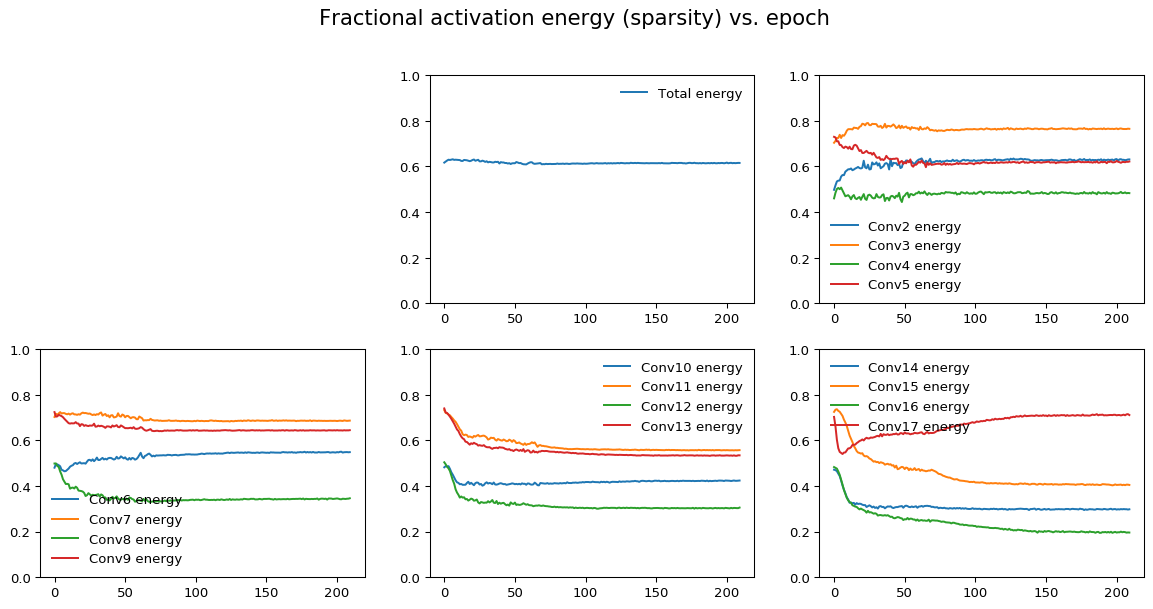

In [0]:
total_energy = fractional_layer_energies1[:,0]
conv1_energy = fractional_layer_energies1[:,1]
conv2_energy = fractional_layer_energies1[:,2]
conv3_energy = fractional_layer_energies1[:,3]
conv4_energy = fractional_layer_energies1[:,4]
conv5_energy = fractional_layer_energies1[:,5]
conv6_energy = fractional_layer_energies1[:,6]
conv7_energy = fractional_layer_energies1[:,7]
conv8_energy = fractional_layer_energies1[:,8]
conv9_energy = fractional_layer_energies1[:,9]
conv10_energy = fractional_layer_energies1[:,10]
conv11_energy = fractional_layer_energies1[:,11]
conv12_energy = fractional_layer_energies1[:,12]
conv13_energy = fractional_layer_energies1[:,13]
conv14_energy = fractional_layer_energies1[:,14]
conv15_energy = fractional_layer_energies1[:,15]
conv16_energy = fractional_layer_energies1[:,16]
conv17_energy = fractional_layer_energies1[:,17]



ylim = 1
ylow = 0 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
#plt.subplot(231)
#plt.ylim(0, 1)
#plt.plot(test_acc, label = 'Test accuracy')
#plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
#plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.plot(conv17_energy, label = 'Conv17 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)